## Валидация моделей классификации

Данные

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

%matplotlib inline
np.set_printoptions(precision=4)

df_source = pd.read_csv(
    'data/client_segmentation.csv', 
    dtype={'call_diff': np.float32, 'call_diff': np.float32, 'traffic_diff': np.float32, 'customes_class': np.uint16}
)
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

df_source.head(5)

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0
1,-0.889273,-0.537896,-1.959469,2
2,-0.841503,0.846665,0.727606,0
3,1.389749,0.390911,1.789246,1
4,-1.228211,-1.375899,-1.434209,2


Найдите лучший классификатор по метрике f1-score

In [19]:
from sklearn.tree  import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection  import train_test_split
from sklearn.metrics import f1_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scores = {}

gaus = GaussianNB()
gaus.fit(X_train, y_train)
y_pred = gaus.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
scores['GaussianNB'] = f1
print('GaussianNB: ' + str(f1))

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
scores['DecisionTreeClassifier'] = f1
print('DecisionTreeClassifier: ' + str(f1))

knn = KNeighborsClassifier(p=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
scores['KNeighborsClassifier'] = f1
print('KNeighborsClassifier: ' + str(f1))

lr = LogisticRegression(C=10)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
scores['LogisticRegression'] = f1
print('LogisticRegression: '+str(f1))

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
scores['RandomForestClassifier'] = f1
print('RandomForestClassifier: '+str(f1))
print()
print('лучший: {}'.format(list(scores.keys())[list(scores.values()).index(max(scores.values()))])) 
print('f1_score = {}'.format(max(scores.values())))

GaussianNB: 0.8564102564102564
DecisionTreeClassifier: 0.8676767676767677
KNeighborsClassifier: 0.9027777777777778
LogisticRegression: 0.9179292929292929
RandomForestClassifier: 0.9027777777777778

лучший: LogisticRegression
f1_score = 0.9179292929292929


## Валидация моделей линейной регрессии

Пользуясь методом .score подберите наилучшее значение степени полинома

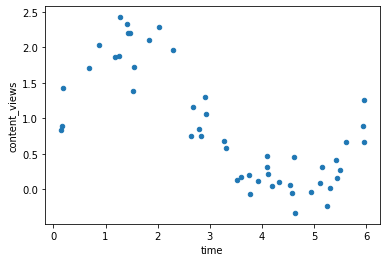

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/content_views_toy_set.csv', encoding='utf8')
df.plot.scatter(x='time', y='content_views')
plt.show()

X = df['time'].values
y = df['content_views'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train.reshape(-1, 1), y_train)


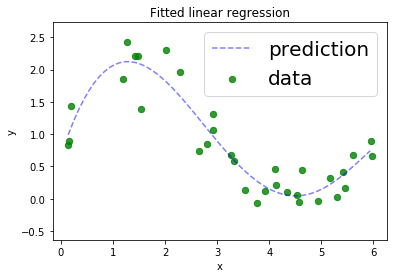

In [23]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

X_train_5 = generate_degrees(X_train, 5)
X_test_5 = generate_degrees(X_test, 5)
reg_5 = LinearRegression().fit(X_train_5, y_train)

# строим график
margin = 0.3
support = np.arange(X.min(), X.max(), step=0.1)

X_test_support = generate_degrees(support, 5)
y_hat = reg_5.predict(X_test_support)

plt.plot(support, y_hat, 'b--', alpha=0.5, label='prediction')
plt.scatter(X_train, y_train, 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(X.min() - margin, X.max() + margin)
plt.ylim(y.min() - margin, y.max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

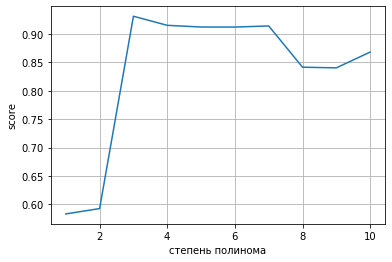

Степень полинома = 3
Качество модели = 0.9313123641187698
Коэффициенты линейной регрессии w = [ 1.9519 -0.9423  0.1039]


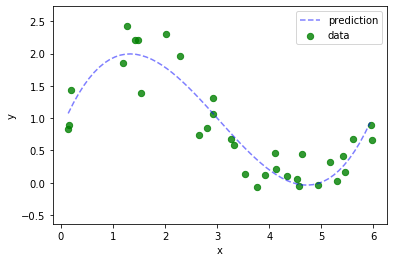

In [24]:
score_list = []
for i in range(1, 11):
    X_train_i = generate_degrees(X_train, i)
    X_test_i = generate_degrees(X_test, i)
    reg_i = LinearRegression().fit(X_train_i, y_train)
    y_pred_i = reg_i.predict(X_test_i)
    score_list.append(reg_i.score(X_test_i, y_test))

plt.plot(np.arange(1,11), score_list)
plt.grid()
plt.xlabel('степень полинома')
plt.ylabel('score')
plt.show()
    
    
print('Степень полинома = {}'.format(score_list.index(max(score_list))+1))
print('Качество модели = {}'.format(max(score_list)))

X_train_max = generate_degrees(X_train, score_list.index(max(score_list))+1)
reg_max = LinearRegression().fit(X_train_max, y_train)

print('Коэффициенты линейной регрессии w = {}'.format(reg_max.coef_))

X_test_support = generate_degrees(support, score_list.index(max(score_list))+1)
y_hat = reg_max.predict(X_test_support)

plt.plot(support, y_hat, 'b--', alpha=0.5, label='prediction')
plt.scatter(X_train, y_train, 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(X.min() - margin, X.max() + margin)
plt.ylim(y.min() - margin, y.max() + margin)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()